I have chosen to move forward in this class using python and the OpenCV Library 
Below are the imports for the Packages

In [1]:
import cv2  
import numpy as np
from matplotlib import pyplot as plt

Importing Images for HW2 Question 1

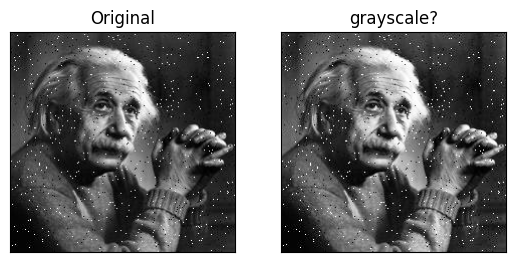

In [2]:
img = cv2.imread('imgnoise1.jpg')
grayEinstein = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(grayEinstein,cmap='Greys_r'),plt.title('grayscale?')
plt.xticks([]), plt.yticks([])
plt.show()

This is an example of the built-in function for the OpenCV library
THIS IS NOT MY SUBMISSION

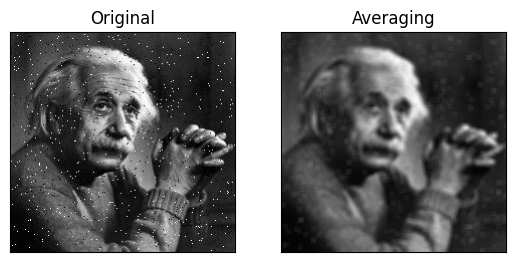

In [3]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

This is an implementation that I found off of StackExchange
THIS IS FOR RECON ONLY; NOT MY SUBMISSION

In [4]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


Very strange color changes in this one.... Perhaps ask the TA? ANSWER: must set plt.imshow(img,cmap='Greys_r')

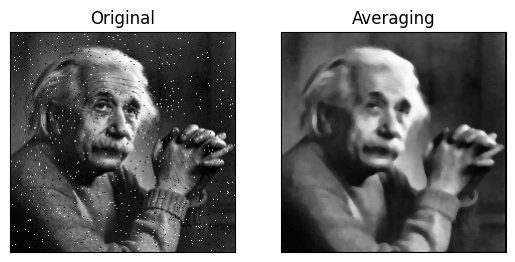

In [5]:
netFilter = median_filter(grayEinstein,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(netFilter,cmap='Greys_r'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

This is my implementation after doing some more research and finding a helpful video tutorial
https://www.youtube.com/watch?v=lJXCzhJI6hU

In [6]:
def smoothingFilter(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Must convert to grayscale in order to do operations
    kernel = np.ones((5,5),np.float32)/25 #creates 5x5 kernel 
    kernelShape = kernel.shape #tuple of kernel dimensions
    imageShape = img.shape     #tuple of image dimensions
    
    #Zero padding below to add 2 units around the border of the image
    paddedDimensions = (imageShape[0]+kernelShape[0]-1,imageShape[1]+kernelShape[1]-1)
    paddedImage = np.zeros(paddedDimensions)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
            paddedImage[i+int((kernelShape[0]-1)/2), j+int((kernelShape[1]-1)/2)] = img[i,j]
    
    #running the Filter
    for i in range(imageShape[0]):   #Create moving window
        for j in range(imageShape[1]):
            window = paddedImage[i:i+kernelShape[0],j:j+kernelShape[1]] #window matrix gathers values from image
            smoothValue = np.sum(window*kernel)
            img[i,j] = smoothValue #window gets multiplied against the kernel and the sum of the matrix replaces the center
    return img


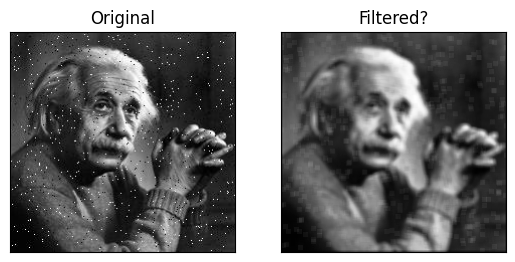

In [7]:
img1 = cv2.imread('imgnoise1.jpg')
smooth1 = smoothingFilter(img1)
plt.subplot(121),plt.imshow(img1,cmap='Greys_r'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(smooth1,cmap='Greys_r'),plt.title('Filtered?')
plt.xticks([]), plt.yticks([])
plt.show()

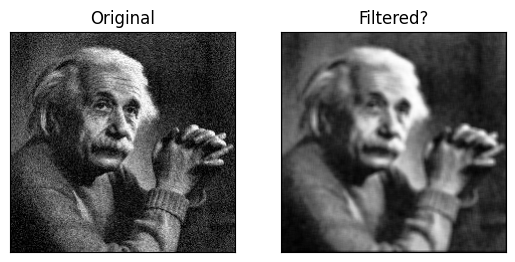

In [8]:
img2 = cv2.imread('imgnoise2.jpg')
smooth2 = smoothingFilter(img2)
plt.subplot(121),plt.imshow(img2,cmap='Greys_r'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(smooth2,cmap='Greys_r'),plt.title('Filtered?')
plt.xticks([]), plt.yticks([])
plt.show()



Question 1 part 2
I have to create a weight matrix, multiply the values in the window by the weight matrix and then take the median average of those values

In [9]:
def centerWeightedFilter(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Must convert to grayscale in order to do operations
    #Weight matrix as TA, Carlos, described
    weightMatrix= np.array([[1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,9,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1]])
    
    kernelShape = weightMatrix.shape #tuple of kernel dimensions
    imageShape = img.shape     #tuple of image dimensions
    
    #Zero padding below to add 2 units around the border of the image
    paddedDimensions = (imageShape[0]+kernelShape[0]-1,imageShape[1]+kernelShape[1]-1)
    paddedImage = np.zeros(paddedDimensions)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
          paddedImage[i+int((kernelShape[0]-1)/2), j+int((kernelShape[1]-1)/2)] = img[i,j]
    
    #running the Filter
    for i in range(imageShape[0]):   #v Create moving window
        for j in range(imageShape[1]):
            window = paddedImage[i:i+kernelShape[0],j:j+kernelShape[1]] #window matrix gathers values from image
            
            #Center Weighted algorthim based on chapter 2 slide 39
            #values = np.empty(int(np.sum(weightMatrix)))
            values = []
            for x in range(kernelShape[0]):
                for y in range(kernelShape[1]):
                    z = np.ones(int(weightMatrix[y,x]))*window[y,x] 
                    values = np.append(values,z) #^ array of 1s of size(weight) multiplied by window value
            smoothValue = np.median(values) 
            img[i,j] = smoothValue  #center of the window gets replaces with median value
    return img


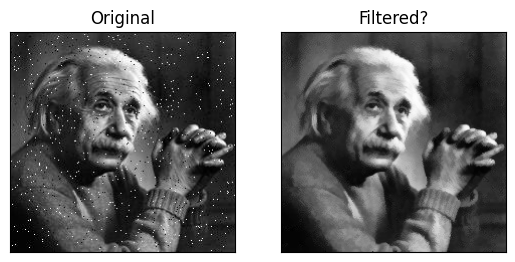

In [10]:
img1 = cv2.imread('imgnoise1.jpg')
smooth1 = centerWeightedFilter(img1)
plt.subplot(121),plt.imshow(img1,cmap='Greys_r'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(smooth1,cmap='Greys_r'),plt.title('Filtered?')
plt.xticks([]), plt.yticks([])
plt.show()

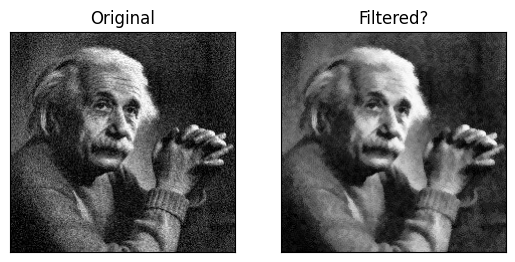

In [11]:
img2 = cv2.imread('imgnoise2.jpg')
smooth2 = centerWeightedFilter(img2)
plt.subplot(121),plt.imshow(img2,cmap='Greys_r'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(smooth2,cmap='Greys_r'),plt.title('Filtered?')
plt.xticks([]), plt.yticks([])
plt.show()

Sent an Email to the TA and we'll see where it goes from there...      
Perhaps weight Matrix is problematic?       
Perhaps Zero padding is problematic?

Problem 3       
Implement a Sobel edge detector and apply to building.jpg       
Starting with the openCV built-in function... Not my Code!!!

np.empty() was replaced with 


In [12]:
#implement Sobel edge Detector
buildingImg = cv2.imread('building.jpg')
#imgGray = cv2.cvtColor(buildingImg, cv2.COLOR_BGR2GRAY) #Must convert to grayscale in order to do operations
img_blur = smoothingFilter(buildingImg)
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


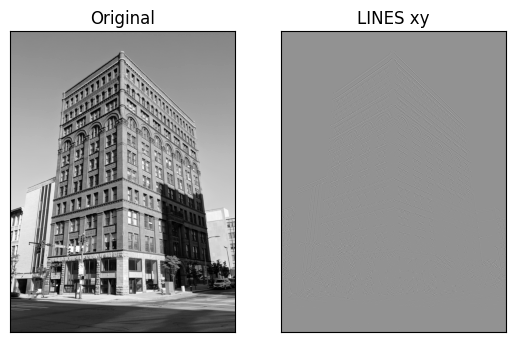

In [13]:
plt.subplot(121),plt.imshow(img_blur,cmap='Greys_r'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobelxy,cmap='Greys_r'),plt.title('LINES xy')
plt.xticks([]), plt.yticks([])
plt.show()

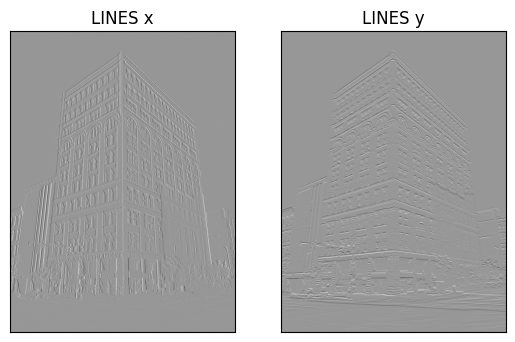

In [14]:
plt.subplot(121),plt.imshow(sobelx,cmap='Greys_r'),plt.title('LINES x')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobely,cmap='Greys_r'),plt.title('LINES y')
plt.xticks([]), plt.yticks([])
plt.show()

My implementation based on 
www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/

In [15]:
def edgeDetectSobel(img):
    #better version of Sobel Filter from Chapter 2 slide 64
    kernel = np.array([[-3,0,3],
                       [-10,0,10],
                       [-3,0,3]])/32
    
    edgeX = np.zeros_like(img) #create arrays for edge data
    edgeY = np.zeros_like(img)
    kernelShape = kernel.shape #tuple of kernel dimensions
    imageShape = img.shape     #tuple of image dimensions
    
    #Zero padding below to add 2 units around the border of the image
    paddedDimensions = (imageShape[0]+kernelShape[0]-1,imageShape[1]+kernelShape[1]-1)
    paddedImage = np.zeros(paddedDimensions)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
          paddedImage[i+int((kernelShape[0]-1)/2), j+int((kernelShape[1]-1)/2)] = img[i,j]
    
    #running the Filter
    for i in range(imageShape[0]):   #Create moving window
        for j in range(imageShape[1]):
            window = paddedImage[i:i+kernelShape[0],j:j+kernelShape[1]] #window matrix gathers values from image                            
            edgeX[i,j] = np.sum(window*kernel)#window gets multiplied against the kernel 
            edgeY[i,j] = np.sum(window*np.flip(kernel.T,axis=0))
            
    gradient = np.sqrt(np.square(edgeX) + np.square(edgeY))
    gradient *= 255.0 / gradient.max() #using Gradient equation from Chapter 2 Slide 60
    
    return edgeX, edgeY, gradient


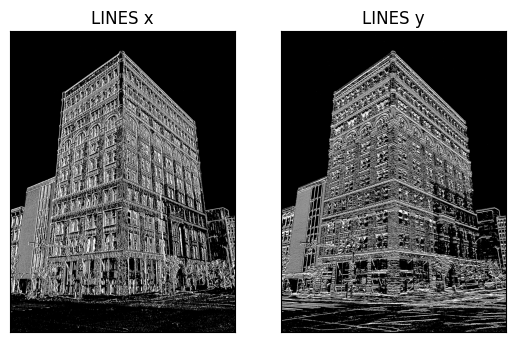

In [16]:
test1, test2, test3 = edgeDetectSobel(img_blur)
plt.subplot(121),plt.imshow(test1,cmap='Greys_r'),plt.title('LINES x')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test2,cmap='Greys_r'),plt.title('LINES y')
plt.xticks([]), plt.yticks([])
plt.show()

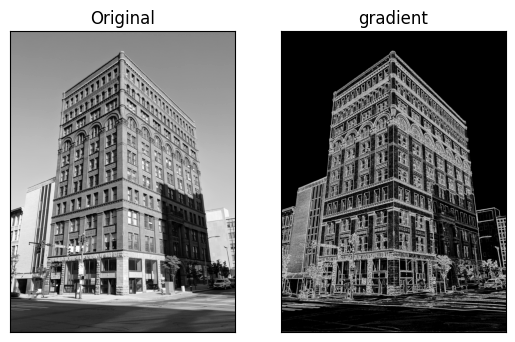

In [17]:
plt.subplot(121),plt.imshow(img_blur,cmap='Greys_r'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test3,cmap='Greys_r'),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

I think this is a better result than the built-in function... Sent an Email to the TA to confirm